In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
exposure = pd.read_csv('Exposure_by_Station_MAR_0.1dd.csv')
event_loss = pd.read_csv('QuakeCube_Morocco_GCAT_ELT_120222.csv')
IM = pd.read_csv('E_S_IM_MAR_0.1dd_buffer.csv')

#Exposure data

In [3]:
exposure

,Station_ID,Longitude,Latitude,Exposure,Weight
0,1,-17.1,21.4,0.000000e+00,0.000000e+00
1,2,-17.1,21.5,0.000000e+00,0.000000e+00
2,3,-17.0,21.4,8.474549e+05,5.341785e-07
3,4,-17.0,21.5,5.742884e+05,3.619928e-07
4,5,-17.0,21.6,3.936061e+05,2.481028e-07
...,...,...,...,...,...
6068,6069,-1.1,32.5,3.400090e+06,2.143188e-06
6069,6070,-1.1,32.6,3.626943e+05,2.286181e-07
6070,6071,-1.0,32.4,0.000000e+00,0.000000e+00
6071,6072,-1.0,32.5,5.596294e+05,3.527527e-07


In [ ]:
#Check for missing values
exposure.isnull().sum()


Station_ID    0
Longitude     0
Latitude      0
Exposure      0
Weight        0
dtype: int64

In [ ]:
sum(exposure.duplicated())

0

In [ ]:
#Verify that the sum of the 'Weight' column is approximately 1 to ensure proper scaling.
weight_sum = exposure['Weight'].sum()
print(f"Sum of Weights: {weight_sum}")

Sum of Weights: 0.9999999999999329


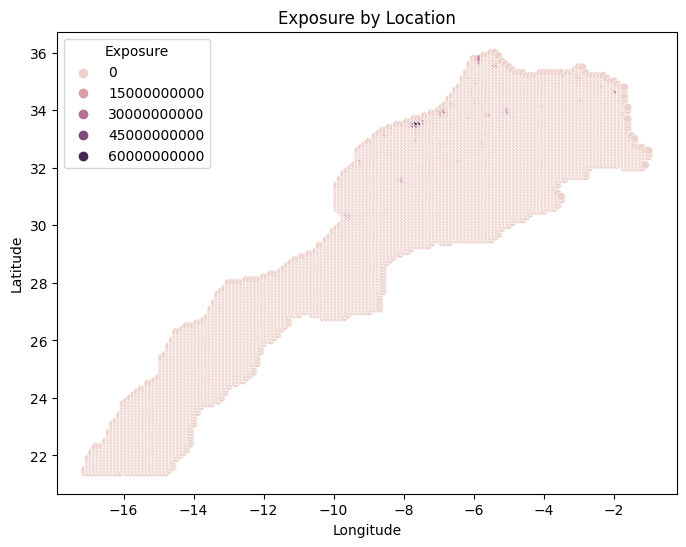

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Exposure', data=exposure)
plt.title('Exposure by Location')
plt.show()

In [ ]:
# Sort the data by 'Exposure' in descending order
sorted_data = exposure.sort_values(by='Exposure', ascending=False)

# Print the stations with the highest exposure
print("Stations with High Exposure:")
print(sorted_data.head(10))

Stations with High Exposure:
      Station_ID  Longitude  Latitude      Exposure    Weight
3227        3228       -7.6      33.6  6.582961e+10  0.041495
3272        3273       -7.5      33.6  5.536065e+10  0.034896
3597        3598       -6.8      34.0  2.783850e+10  0.017548
3226        3227       -7.6      33.5  2.736102e+10  0.017247
5949        5950       -1.9      34.7  2.712729e+10  0.017099
4178        4179       -5.8      35.8  2.199651e+10  0.013865
4659        4660       -5.0      34.0  2.186388e+10  0.013782
3181        3182       -7.7      33.5  2.125851e+10  0.013400
3182        3183       -7.7      33.6  2.081630e+10  0.013121
4177        4178       -5.8      35.7  1.881743e+10  0.011861


#Event Loss

In [ ]:
event_loss

,EventID,Magnitude,Loss,centroid_depth,Longitude,Latitude,Rate
0,471202,7.05,2.362179e+10,12.618680,-5.284471,34.12893,0.0001
1,455356,6.75,1.280924e+10,8.208484,-5.388919,35.35529,0.0001
2,504158,6.65,1.028324e+10,5.735765,-5.163308,34.12670,0.0001
3,489184,6.65,1.023946e+10,11.471530,-5.341311,34.11058,0.0001
4,443122,6.85,8.189980e+09,4.446262,-6.007840,34.99998,0.0001
...,...,...,...,...,...,...,...
26562,529399,4.55,0.000000e+00,35.000000,-2.502230,33.20127,0.0001
26563,529418,4.65,0.000000e+00,5.000000,-1.176970,34.26032,0.0001
26564,529744,6.15,0.000000e+00,3.380946,0.648919,36.08704,0.0001
26565,529749,5.15,0.000000e+00,35.000000,-9.726991,35.11334,0.0001


In [ ]:
# Check for missing values
missing_values = event_loss.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 EventID           0
Magnitude         0
Loss              0
centroid_depth    0
Longitude         0
Latitude          0
Rate              0
dtype: int64


In [ ]:
# Check for duplicates
sum(event_loss.duplicated())

0

In [ ]:
unique_event_ids = event_loss['EventID'].nunique()
print("Number of unique Event IDs:", unique_event_ids)

Number of unique Event IDs: 26567


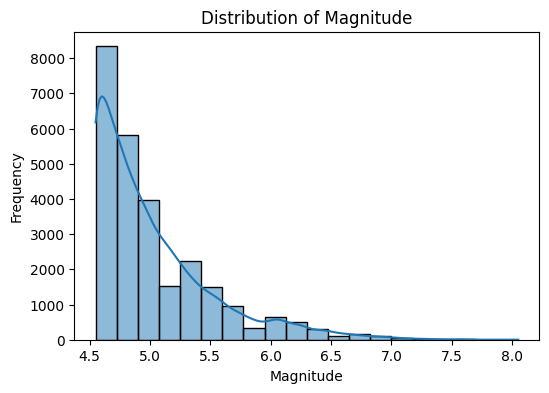

In [ ]:
# Distribution of Magnitude
plt.figure(figsize=(6, 4))
sns.histplot(event_loss['Magnitude'], bins=20, kde=True)
plt.title('Distribution of Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


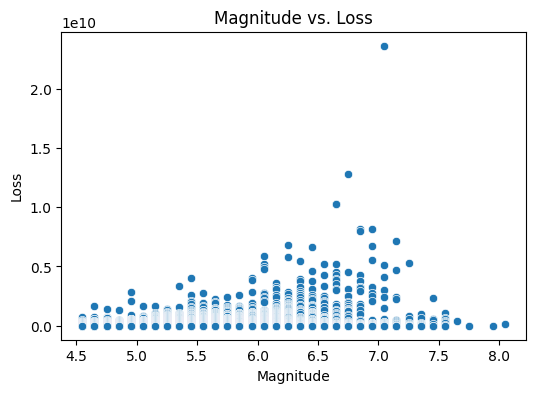

In [ ]:
# Scatterplot of Magnitude vs. Loss
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Magnitude', y='Loss', data=event_loss)
plt.title('Magnitude vs. Loss')
plt.xlabel('Magnitude')
plt.ylabel('Loss')
plt.show()

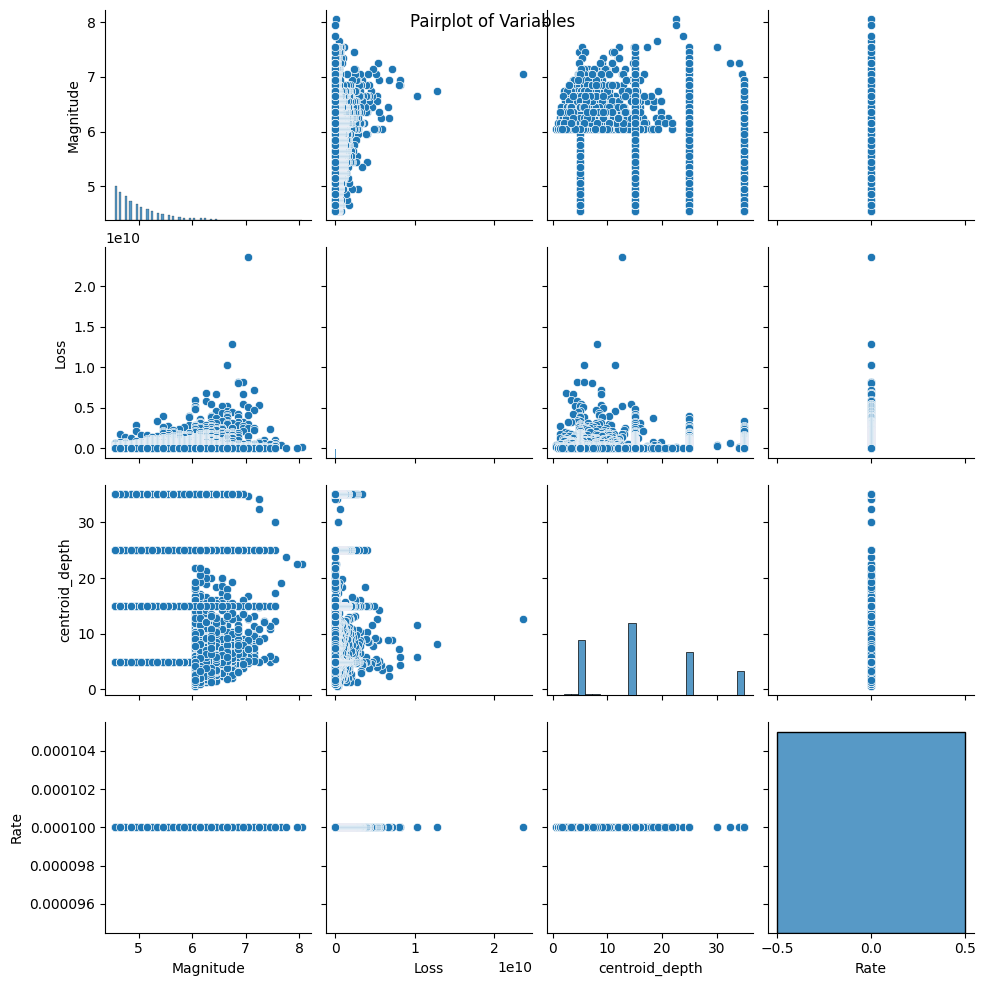

In [ ]:
# Pairplot for multiple variable comparisons
sns.pairplot(event_loss, vars=['Magnitude', 'Loss', 'centroid_depth', 'Rate'])
plt.suptitle('Pairplot of Variables')
plt.show()

<Axes: >

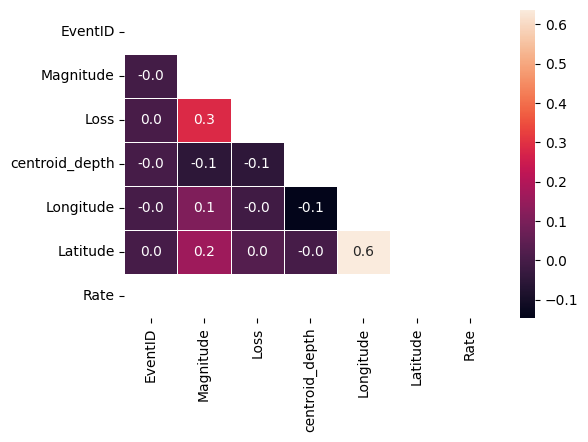

In [ ]:
f,ax = plt.subplots(figsize=(6, 4))
matrix = np.triu(event_loss.corr())
sns.heatmap(event_loss.corr(), annot=True, linewidths=.5, fmt= ".1f",ax=ax, mask=matrix)


#IM_MAR

In [ ]:
IM

,Event_ID,Station_ID,IM
0,439369,3805,0.059536
1,439369,3806,0.069611
2,439369,3858,0.052942
3,439369,3859,0.058295
4,439369,3860,0.071130
...,...,...,...
7663480,529768,6069,0.058861
7663481,529768,6070,0.112062
7663482,529768,6071,0.059022
7663483,529768,6072,0.058121


In [ ]:
# Check for missing values
missing_values = IM.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Event_ID      0
Station_ID    0
IM            0
dtype: int64


In [ ]:
# Check for duplicates
sum(IM.duplicated())

0

In [ ]:
# Count the number of unique 'Event_ID' values
unique_event_count = IM['Event_ID'].nunique()

# Print the result
print("Sum of unique Event_ID values:", unique_event_count)

Sum of unique Event_ID values: 24652


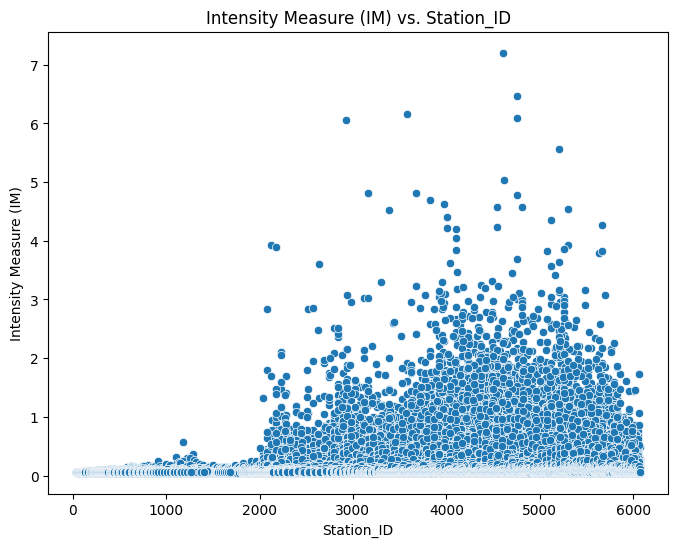

In [ ]:
# Scatterplot of IM vs. Station_ID
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Station_ID', y='IM', data=IM)
plt.title('Intensity Measure (IM) vs. Station_ID')
plt.xlabel('Station_ID')
plt.ylabel('Intensity Measure (IM)')
plt.show()

In [ ]:
# For example, to calculate the average IM for each Event_ID:
avg_im_by_event = IM.groupby('Event_ID')['IM'].mean()
avg_im_by_event

Event_ID
439369    0.082122
439370    0.074323
439371    0.092920
439372    0.079265
439373    0.071183
            ...   
529761    0.064475
529762    0.053251
529764    0.060082
529765    0.059679
529768    0.084861
Name: IM, Length: 24652, dtype: float64

#Merging

In [ ]:
# Merge IM and Event Loss datasets first based on EventID
merged_im_event_loss = pd.merge(IM, event_loss, left_on='Event_ID', right_on='EventID', how='outer')
merged_im_event_loss

,Event_ID,Station_ID,IM,EventID,Magnitude,Loss,centroid_depth,Longitude,Latitude,Rate
0,439369.0,3805.0,0.059536,439369,4.75,77169147.5,5.0,-5.495030,34.84378,0.0001
1,439369.0,3806.0,0.069611,439369,4.75,77169147.5,5.0,-5.495030,34.84378,0.0001
2,439369.0,3858.0,0.052942,439369,4.75,77169147.5,5.0,-5.495030,34.84378,0.0001
3,439369.0,3859.0,0.058295,439369,4.75,77169147.5,5.0,-5.495030,34.84378,0.0001
4,439369.0,3860.0,0.071130,439369,4.75,77169147.5,5.0,-5.495030,34.84378,0.0001
...,...,...,...,...,...,...,...,...,...,...
7665395,NaN,NaN,NaN,528957,5.45,0.0,15.0,-4.466590,36.74707,0.0001
7665396,NaN,NaN,NaN,528963,4.85,0.0,5.0,-5.219871,36.82861,0.0001
7665397,NaN,NaN,NaN,528972,6.15,0.0,25.0,-11.304950,35.96668,0.0001
7665398,NaN,NaN,NaN,529749,5.15,0.0,35.0,-9.726991,35.11334,0.0001


In [ ]:
unique_event_ids = merged_im_event_loss['EventID'].nunique()
print("Number of unique Event IDs:", unique_event_ids)

Number of unique Event IDs: 26567


In [ ]:
# Fill missing values with 0
merged_im_event_loss.fillna(0, inplace=True)

In [ ]:
# Merge the merged_df with the third dataset on 'Station_ID'
final_merged_df = pd.merge(merged_im_event_loss, exposure, on='Station_ID', how='left')
final_merged_df


,Event_ID,Station_ID,IM,EventID,Magnitude,Loss,centroid_depth,Longitude_x,Latitude_x,Rate,Longitude_y,Latitude_y,Exposure,Weight
0,439369.0,3805.0,0.059536,439369,4.75,77169147.5,5.0,-5.495030,34.84378,0.0001,-6.4,34.4,4.712610e+08,0.000297
1,439369.0,3806.0,0.069611,439369,4.75,77169147.5,5.0,-5.495030,34.84378,0.0001,-6.4,34.5,6.658418e+08,0.000420
2,439369.0,3858.0,0.052942,439369,4.75,77169147.5,5.0,-5.495030,34.84378,0.0001,-6.3,34.3,2.224004e+09,0.001402
3,439369.0,3859.0,0.058295,439369,4.75,77169147.5,5.0,-5.495030,34.84378,0.0001,-6.3,34.4,5.018289e+08,0.000316
4,439369.0,3860.0,0.071130,439369,4.75,77169147.5,5.0,-5.495030,34.84378,0.0001,-6.3,34.5,5.900976e+08,0.000372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665395,0.0,0.0,0.000000,528957,5.45,0.0,15.0,-4.466590,36.74707,0.0001,NaN,NaN,NaN,NaN
7665396,0.0,0.0,0.000000,528963,4.85,0.0,5.0,-5.219871,36.82861,0.0001,NaN,NaN,NaN,NaN
7665397,0.0,0.0,0.000000,528972,6.15,0.0,25.0,-11.304950,35.96668,0.0001,NaN,NaN,NaN,NaN
7665398,0.0,0.0,0.000000,529749,5.15,0.0,35.0,-9.726991,35.11334,0.0001,NaN,NaN,NaN,NaN


In [ ]:
missing_values = final_merged_df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Event_ID             0
Station_ID           0
IM                   0
EventID              0
Magnitude            0
Loss                 0
centroid_depth       0
Longitude_x          0
Latitude_x           0
Rate                 0
Longitude_y       1915
Latitude_y        1915
Exposure          1915
Weight            1915
dtype: int64


In [ ]:
# Check for duplicates
sum(final_merged_df.duplicated())

0

In [ ]:
# List of columns to remove
columns_to_remove = ["Event_ID",'Longitude_x', 'Longitude_y',"Latitude_x", "Latitude_y"]

# Remove the specified columns
final_df = final_merged_df.drop(columns=columns_to_remove)

# Reorder the columns in the DataFrame
desired_column_order = ['EventID', "Station_ID", 'Exposure', 'Weight', 'IM', 'Magnitude', 'Loss', 'centroid_depth', 'Rate']

final_df = final_df[desired_column_order]

final_df

,EventID,Station_ID,Exposure,Weight,IM,Magnitude,Loss,centroid_depth,Rate
0,439369,3805.0,4.712610e+08,0.000297,0.059536,4.75,77169147.5,5.0,0.0001
1,439369,3806.0,6.658418e+08,0.000420,0.069611,4.75,77169147.5,5.0,0.0001
2,439369,3858.0,2.224004e+09,0.001402,0.052942,4.75,77169147.5,5.0,0.0001
3,439369,3859.0,5.018289e+08,0.000316,0.058295,4.75,77169147.5,5.0,0.0001
4,439369,3860.0,5.900976e+08,0.000372,0.071130,4.75,77169147.5,5.0,0.0001
...,...,...,...,...,...,...,...,...,...
7665395,528957,0.0,NaN,NaN,0.000000,5.45,0.0,15.0,0.0001
7665396,528963,0.0,NaN,NaN,0.000000,4.85,0.0,5.0,0.0001
7665397,528972,0.0,NaN,NaN,0.000000,6.15,0.0,25.0,0.0001
7665398,529749,0.0,NaN,NaN,0.000000,5.15,0.0,35.0,0.0001


In [ ]:
# Fill missing values with 0
final_df.fillna(0, inplace=True)

In [ ]:
missing_values = final_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 EventID           0
Station_ID        0
Exposure          0
Weight            0
IM                0
Magnitude         0
Loss              0
centroid_depth    0
Rate              0
dtype: int64


In [ ]:
unique_event_ids = final_df['EventID'].nunique()
print("Number of unique Event IDs:", unique_event_ids)

Number of unique Event IDs: 26567


In [ ]:
final_df.to_csv('merged_df.csv', index=False)

In [ ]:
final_df.head()

,EventID,Station_ID,Exposure,Weight,IM,Magnitude,Loss,centroid_depth,Rate
0,439369,3805.0,4.712610e+08,0.000297,0.059536,4.75,77169147.5,5.0,0.0001
1,439369,3806.0,6.658418e+08,0.000420,0.069611,4.75,77169147.5,5.0,0.0001
2,439369,3858.0,2.224004e+09,0.001402,0.052942,4.75,77169147.5,5.0,0.0001
3,439369,3859.0,5.018289e+08,0.000316,0.058295,4.75,77169147.5,5.0,0.0001
4,439369,3860.0,5.900976e+08,0.000372,0.071130,4.75,77169147.5,5.0,0.0001


In [ ]:
#since we have several station for each Event_ID calculate
#then we will get the mean of "exposure", "weight", "IM" for each ID
# Group data by EventID and calculate average "exposure", "weight", "IM"

df = final_df.groupby('EventID').agg({
    'Exposure': 'mean',
    'Weight': 'mean',
    'IM': 'mean',
    'Magnitude': 'first',
    'Loss': 'first',
    'centroid_depth': 'first',
    'Rate': 'first'
})

In [ ]:
df

,Exposure,Weight,IM,Magnitude,Loss,centroid_depth,Rate
EventID,,,,,,,
439369,9.344019e+08,0.000589,0.082122,4.75,7.716915e+07,5.0,0.0001
439370,8.948080e+08,0.000564,0.074323,4.75,1.728780e+07,35.0,0.0001
439371,7.455996e+08,0.000470,0.092920,5.15,4.975969e+07,35.0,0.0001
439372,8.099301e+08,0.000511,0.079265,4.75,1.522857e+06,5.0,0.0001
439373,6.831983e+08,0.000431,0.071183,4.75,1.307489e+07,5.0,0.0001
...,...,...,...,...,...,...,...
529761,9.228981e+08,0.000582,0.064475,5.25,1.112707e+04,5.0,0.0001
529762,2.631579e+09,0.001659,0.053251,4.55,1.786958e+01,25.0,0.0001
529764,4.325609e+09,0.002727,0.060082,5.25,2.373668e+05,15.0,0.0001


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,EventID,Exposure,Weight,IM,Magnitude,Loss,centroid_depth,Rate
0,439369,9.344019e+08,0.000589,0.082122,4.75,7.716915e+07,5.0,0.0001
1,439370,8.948080e+08,0.000564,0.074323,4.75,1.728780e+07,35.0,0.0001
2,439371,7.455996e+08,0.000470,0.092920,5.15,4.975969e+07,35.0,0.0001
3,439372,8.099301e+08,0.000511,0.079265,4.75,1.522857e+06,5.0,0.0001
4,439373,6.831983e+08,0.000431,0.071183,4.75,1.307489e+07,5.0,0.0001
...,...,...,...,...,...,...,...,...
26562,529761,9.228981e+08,0.000582,0.064475,5.25,1.112707e+04,5.0,0.0001
26563,529762,2.631579e+09,0.001659,0.053251,4.55,1.786958e+01,25.0,0.0001
26564,529764,4.325609e+09,0.002727,0.060082,5.25,2.373668e+05,15.0,0.0001
26565,529765,1.245152e+09,0.000785,0.059679,5.85,1.053835e+06,25.0,0.0001


<Axes: >

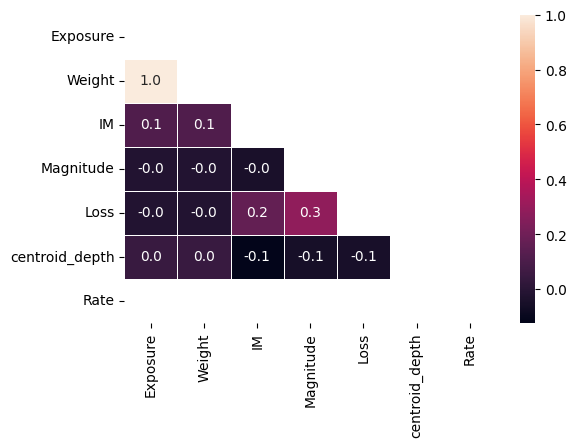

In [ ]:
f,ax = plt.subplots(figsize=(6, 4))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= ".1f",ax=ax, mask=matrix)

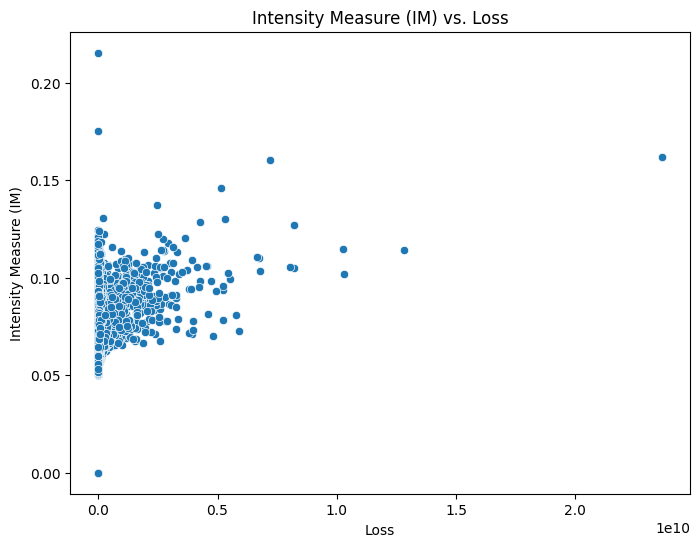

In [ ]:
# Scatterplot of IM vs. Station_ID
plt.figure(figsize=(8, 6))
sns.scatterplot(x='IM', y='Loss', data=df)
plt.title('Intensity Measure (IM) vs. Loss')
plt.xlabel('Intensity Measure (IM)')
plt.ylabel('Intensity Measure (IM)')
plt.show()

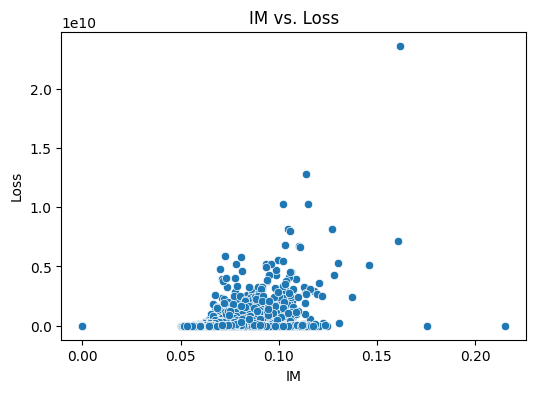

In [ ]:
# Scatterplot of Magnitude vs. Loss
plt.figure(figsize=(6, 4))
sns.scatterplot(x='IM', y='Loss', data=df)
plt.title('IM vs. Loss')
plt.xlabel('IM')
plt.ylabel('Loss')
plt.show()

#Linear Regression

In [ ]:
# Define features (X) and target (y)
X = df[['Exposure', 'Weight', 'IM', 'Magnitude']]
y = df['Loss']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 8.363631551408509e+16
R-squared (R2): 0.12458618265034516


# Quadratic regression prediction

In [ ]:

# Define features (X) and target (y)
X = df[['Exposure', 'Weight', 'IM', 'Magnitude']]
y = df['Loss']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create polynomial features (quadratic)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_train_poly, y_train)

# Predict on the test data with polynomial features
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 9.441601735594082e+16
R-squared (R2): 0.01175600976114366


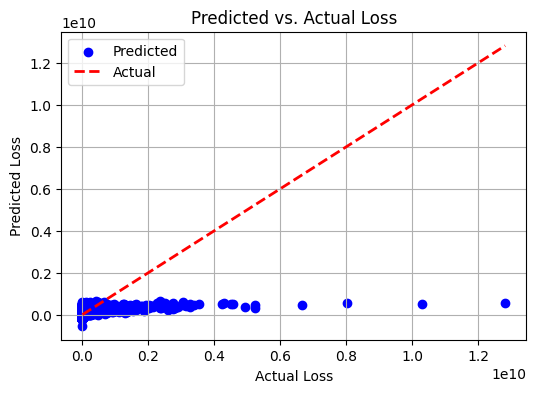

In [ ]:
# Create a scatterplot to compare predicted vs. actual Loss values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Actual')
plt.xlabel('Actual Loss')
plt.ylabel('Predicted Loss')
plt.title('Predicted vs. Actual Loss')
plt.legend()
plt.grid(True)
plt.show()

#GAM Model


In [ ]:
pip install pygam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 62.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


100% (11 of 11) |########################| Elapsed Time: 0:00:05 Time:  0:00:05


Mean Squared Error (MSE): 2.870969605731123e+18
R-squared (R2): -29.050181510263407


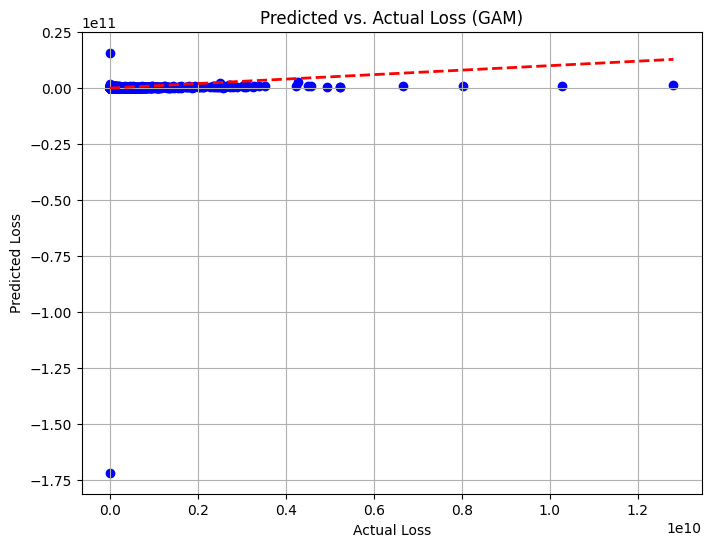

In [ ]:
# Define features (X) and target (y)
X = df[['Exposure', 'Weight', 'IM', 'Magnitude']]
y = df['Loss']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

from pygam import LinearGAM

# Create a GAM model
gam = LinearGAM().gridsearch(X_train.values, y_train.values)

# Make predictions using the GAM model
y_pred = gam.predict(X_test.values)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Loss')
plt.ylabel('Predicted Loss')
plt.title('Predicted vs. Actual Loss (GAM)')
plt.grid(True)
plt.show()